Analyze data based on the dataset obtained from the **Stack Overflow Data - 2023 Survey**


# Data Wrangling

In [2]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os

In [3]:
df = pd.read_csv('survey-2023/survey_results_public.csv')

In [4]:
df.sample(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
62952,62953,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Bootstrapping a business;Professional developm...,"Associate degree (A.A., A.S., etc.)",Books / Physical media;On the job training,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN
68696,68697,I agree,"I am not primarily a developer, but I write co...",45-54 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby;Contribute to open-source projects;Profe...,Something else,Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,148703.0
31393,31394,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Professional development or self-paced learnin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;On t...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40654,40655,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Professional development or self-paced learnin...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,3-5 times a week,1-2 times a week,60-120 minutes a day,Over 120 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,62372.0
60507,60508,I agree,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Hackathons (v...,Formal documentation provided by the owner of ...,...,1-2 times a week,3-5 times a week,1-2 times a week,30-60 minutes a day,60-120 minutes a day,Microservices;Developer portal or other centra...,"Information Services, IT, Software Development...",Too long,Neither easy nor difficult,52688.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

**Question:** Judging from the data obtained from the country 'Canada'

1. Analysis of working trends (in-persion, hybrid or remote) by Age. What age group of people will tend to prefer working remotely?

2. Analyze the frequency of using stackoverflow by age.

3. Which learning platform do working people tend to prefer? Individual review according to each type of work trends (in-persion, hybrid or remote).

4. What is the wanted programming language people who currently working with Python, JavaScript choose?

# Question 1. Analysis of working trends (in-persion, hybrid or remote) by Age. What age group of people will tend to prefer working remotely?

## Get data from Canada by filter Country and Build Function




In [6]:
df = df[df['Country'] == 'Canada']

In [13]:
df.shape

(3507, 84)

In [15]:
def extract_dataframe(df, subset_columns):
    df_sub = df.dropna(subset=subset_columns)[subset_columns]
    return df_sub

def display_count_plot(grouped_df, groupby_col, x_col, y_col):
    # Get unique remote work values
    x_col_values = grouped_df[x_col].unique()
    # Calculate the number of unique remote work values
    num_x_col_values = len(x_col_values)

    # Calculate the width of each bar
    bar_width = 0.3/ num_x_col_values

    # Plot the grouped_df
    plt.figure(figsize=(8, 9))
    for i, (_group, data) in enumerate(grouped_df.groupby(groupby_col)):
        # Calculate the x-coordinates for the bars
        x_coords = np.arange(len(data[x_col].unique())) + i  *bar_width - (num_x_col_values / 2)*  bar_width

        # Plot the bars
        plt.barh(x_coords, data[y_col], height=bar_width, label=_group)

        # Add value annotations
        for j, count in enumerate(data[y_col]):
            plt.text(count, x_coords[j], str(count), ha='left', va='center', fontsize=7)

    # Set the y-ticks to be the unique remote work values
    plt.yticks(np.arange(len(x_col_values)), x_col_values)

    # Add labels and title
    plt.xlabel('Count')
    plt.ylabel(f'{x_col}')
    plt.title(f'Count of {x_col} by {groupby_col} Group')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

## Data Prepare and Modeling

In [17]:
df_question_1 = extract_dataframe(df, ['RemoteWork','Age'])
df_question_1.describe()

,RemoteWork,Age
count,2980,2980
unique,3,8
top,Remote,25-34 years old
freq,1624,1172


In [ ]:
grouped_df_question_1 = df_question_1.groupby('Age')['RemoteWork'].value_counts()
grouped_df_question_1 = grouped_df_question_1.reset_index(name='Count')
grouped_df_question_1

,Age,RemoteWork,Count
0,18-24 years old,Remote,142
1,18-24 years old,"Hybrid (some remote, some in-person)",132
2,18-24 years old,In-person,62
3,25-34 years old,Remote,631
4,25-34 years old,"Hybrid (some remote, some in-person)",451
5,25-34 years old,In-person,90
6,35-44 years old,Remote,518
7,35-44 years old,"Hybrid (some remote, some in-person)",299
8,35-44 years old,In-person,55
9,45-54 years old,Remote,216


## Data visuallize

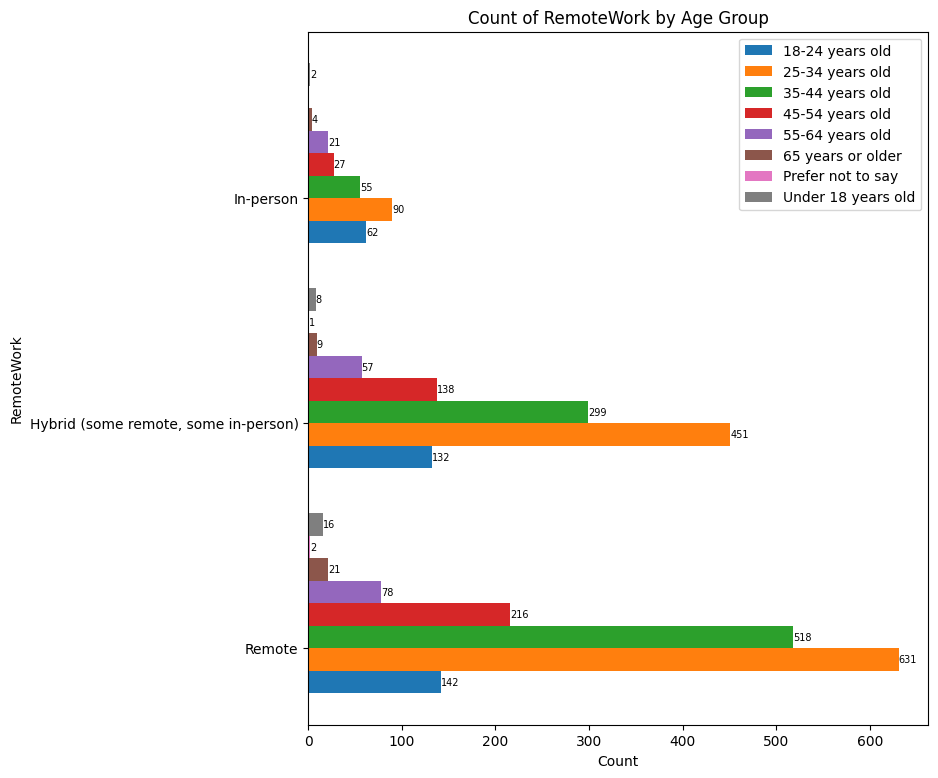

In [ ]:
display_count_plot(grouped_df_question_1, 'Age', 'RemoteWork', 'Count')

## Analysis results

Based on the statistical working trend graph by age in Canada in 2023 shown above, we can see that there is a clearly different distribution between the ages.
* The graph shows that the majority of IT workers will tend to prefer remote work rather than hybrid or in-person in 2023. However, that clarity is only shown in the age groups, except 18-24 , because we can see that the difference in the number of people voting for the hybrid is not too big of a difference with the remote.
* For each employment trend, we can see that the largest number of people in the survey are between the ages of 25-34. And people will almost openly share their need for work tendencies with others. We can see that the 'prefer not to say' index is very low, almost none.
* And that is also the answer to the trend of remote working, the age group 25-34 accounts for the most number

# Question 2: Analyze the frequency of using stackoverflow by age.


## Data Prepare and Modeling

In [18]:
df_question_2 = extract_dataframe(df, ['SOVisitFreq','Age'])
df_question_2.describe()

,SOVisitFreq,Age
count,3480,3480
unique,5,8
top,A few times per week,25-34 years old
freq,1165,1251


In [20]:
grouped_df_question_2 = df_question_2.groupby('Age')['SOVisitFreq'].value_counts()
grouped_df_question_2 = grouped_df_question_2.reset_index(name='Count')
grouped_df_question_2

,Age,SOVisitFreq,Count
0,18-24 years old,A few times per week,201
1,18-24 years old,Daily or almost daily,124
2,18-24 years old,A few times per month or weekly,111
3,18-24 years old,Multiple times per day,64
4,18-24 years old,Less than once per month or monthly,17
5,25-34 years old,A few times per week,431
6,25-34 years old,A few times per month or weekly,304
7,25-34 years old,Daily or almost daily,304
8,25-34 years old,Multiple times per day,151
9,25-34 years old,Less than once per month or monthly,61


## Data visuallize

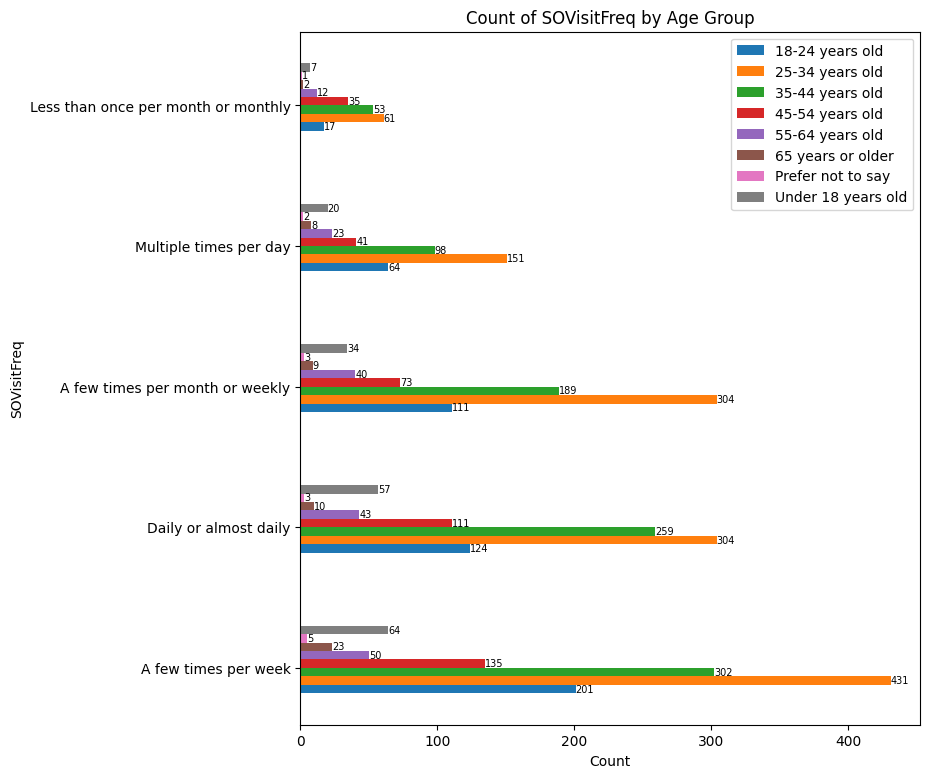

In [ ]:
display_count_plot(grouped_df_question_2, 'Age', 'SOVisitFreq', 'Count')

## Analysis results

Based on the Canadian age-based Stack Overflow usage statistics in 2023 shown above, we can see that there is also a wide variation in usage frequency between the ages:
* The chart shows that programmers will mostly use Stack Overflow for their work a few times per week. The remaining few still exist, is to use less than once per month or monthly.
* Analyzing in more detail, we can see that the number of Stack Overflow users will still account for the majority in the age group of 25-34 years old, followed by 35-44 years old and gradually less for later ages.
* Besides, the rejuvenation in using Stack Overflow is that the number of users under the age of 18 has a slight but still noticeable increase.

# Question 3: Which learning platform do working people tend to prefer? Individual review according to each type of work trends (in-persion, hybrid or remote).

## Data Prepare and Modeling

In [25]:
df_question_3 = extract_dataframe(df, ['RemoteWork','LearnCode'])
df_question_3.describe()

,RemoteWork,LearnCode
count,2973,2973
unique,3,324
top,Remote,Books / Physical media;Online Courses or Certi...
freq,1620,116


In [26]:
# Split the values in 'LearnCode' column by ';'
df_question_3['LearnCode'] = df_question_3['LearnCode'].str.split(';')
df_question_3


,RemoteWork,LearnCode
40,"Hybrid (some remote, some in-person)","[Books / Physical media, Online Courses or Cer..."
45,Remote,"[Books / Physical media, Colleague, On the job..."
114,In-person,"[Colleague, Online Courses or Certification, O..."
140,Remote,"[Online Courses or Certification, Other online..."
164,"Hybrid (some remote, some in-person)","[Friend or family member, Online Courses or Ce..."
...,...,...
89089,Remote,"[Books / Physical media, Friend or family memb..."
89120,Remote,"[Online Courses or Certification, Other online..."
89148,Remote,"[Online Courses or Certification, On the job t..."
89155,Remote,"[Online Courses or Certification, Other online..."


In [27]:
# Create new rows based on the separated values
df_question_3 = df_question_3.explode('LearnCode')
# Reset the index
df_question_3 = df_question_3.reset_index(drop=True)
df_question_3

,RemoteWork,LearnCode
0,"Hybrid (some remote, some in-person)",Books / Physical media
1,"Hybrid (some remote, some in-person)",Online Courses or Certification
2,"Hybrid (some remote, some in-person)","Other online resources (e.g., videos, blogs, f..."
3,Remote,Books / Physical media
4,Remote,Colleague
...,...,...
10357,Remote,Online Courses or Certification
10358,Remote,"Other online resources (e.g., videos, blogs, f..."
10359,Remote,Coding Bootcamp
10360,Remote,"Other online resources (e.g., videos, blogs, f..."


In [24]:
grouped_df_question_3 = df_question_3.groupby('RemoteWork')['LearnCode'].value_counts()
grouped_df_question_3 = grouped_df_question_3.reset_index(name='Count')
grouped_df_question_3

,RemoteWork,LearnCode,Count
0,"Hybrid (some remote, some in-person)","Other online resources (e.g., videos, blogs, f...",856
1,"Hybrid (some remote, some in-person)","School (i.e., University, College, etc)",686
2,"Hybrid (some remote, some in-person)",On the job training,625
3,"Hybrid (some remote, some in-person)",Books / Physical media,582
4,"Hybrid (some remote, some in-person)",Online Courses or Certification,522
5,"Hybrid (some remote, some in-person)",Colleague,274
6,"Hybrid (some remote, some in-person)",Friend or family member,114
7,"Hybrid (some remote, some in-person)",Hackathons (virtual or in-person),110
8,"Hybrid (some remote, some in-person)",Coding Bootcamp,87
9,"Hybrid (some remote, some in-person)",Other (please specify):,56


## Data visuallize

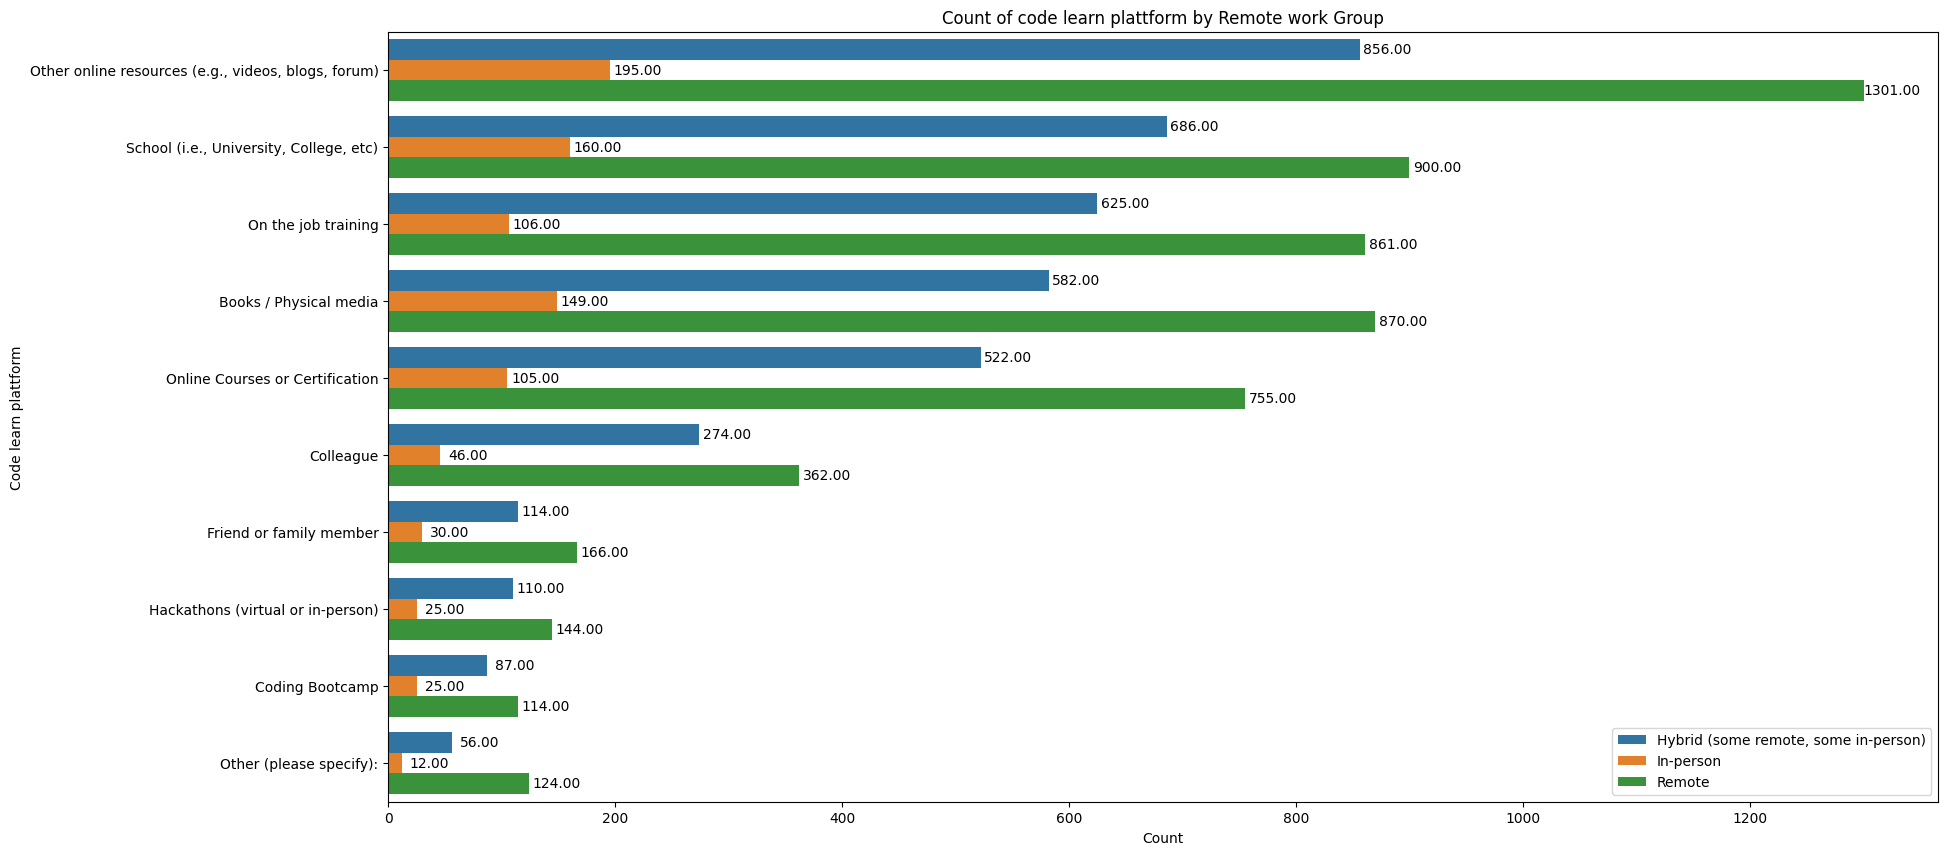

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Count',
            y='LearnCode',
            hue='RemoteWork',
            data=grouped_df_question_3,
            orient='h')

plt.xlabel('Count')
plt.ylabel(f'Code learn plattform')
plt.title(f'Count of code learn plattform by Remote work Group')

plt.legend(title_fontsize='40')


# Add values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha = 'center',
                va = 'center',
                xytext = (20, 0),
                textcoords = 'offset points')

plt.show()

## Analysis results

Based on the statistical chart of programmers' choice of learning platform based on their remote work trends, we can see the diversity in the choice of learning platform, and besides, there is a clear difference in the influence work trends.
* It can be seen that most developers will choose Other online resources and very few will choose Coding Bootcamp and Other learning platform.
* In each type of learning platform, the majority will be remote programmers, and the minority will work in-person. The quite obvious difference is depicted through the graph.

# Question 4: What is the wanted programming language people who currently working with Python, JavaScript choose?

## Data Prepare and Modeling

In [28]:
df_question_4 = extract_dataframe(df, ['LanguageHaveWorkedWith','LanguageWantToWorkWith'])
df_question_4.describe()

,LanguageHaveWorkedWith,LanguageWantToWorkWith
count,3175,3175
unique,2193,2127
top,HTML/CSS;JavaScript;TypeScript,Rust
freq,33,72


In [29]:

df_question_4['LanguageHaveWorkedWith'] = df_question_4['LanguageHaveWorkedWith'].str.split(';')
df_question_4['LanguageWantToWorkWith'] = df_question_4['LanguageWantToWorkWith'].str.split(';')
# Create new rows based on the separated values
df_question_4 = df_question_4.explode('LanguageHaveWorkedWith')
df_question_4 = df_question_4.explode('LanguageWantToWorkWith')
# Reset the index
df_question_4 = df_question_4.reset_index(drop=True)
df_question_4

,LanguageHaveWorkedWith,LanguageWantToWorkWith
0,C,APL
1,C,Clojure
2,C,Dart
3,C,Delphi
4,C,Haskell
...,...,...
95586,TypeScript,HTML/CSS
95587,TypeScript,JavaScript
95588,TypeScript,Ruby
95589,TypeScript,SQL


In [ ]:
grouped_df_question_4 = df_question_4.groupby('LanguageHaveWorkedWith')['LanguageWantToWorkWith'].value_counts()
grouped_df_question_4 = grouped_df_question_4.reset_index()
grouped_df_question_4.nunique()

LanguageHaveWorkedWith     51
LanguageWantToWorkWith     51
count                     272
dtype: int64

## Data visuallize

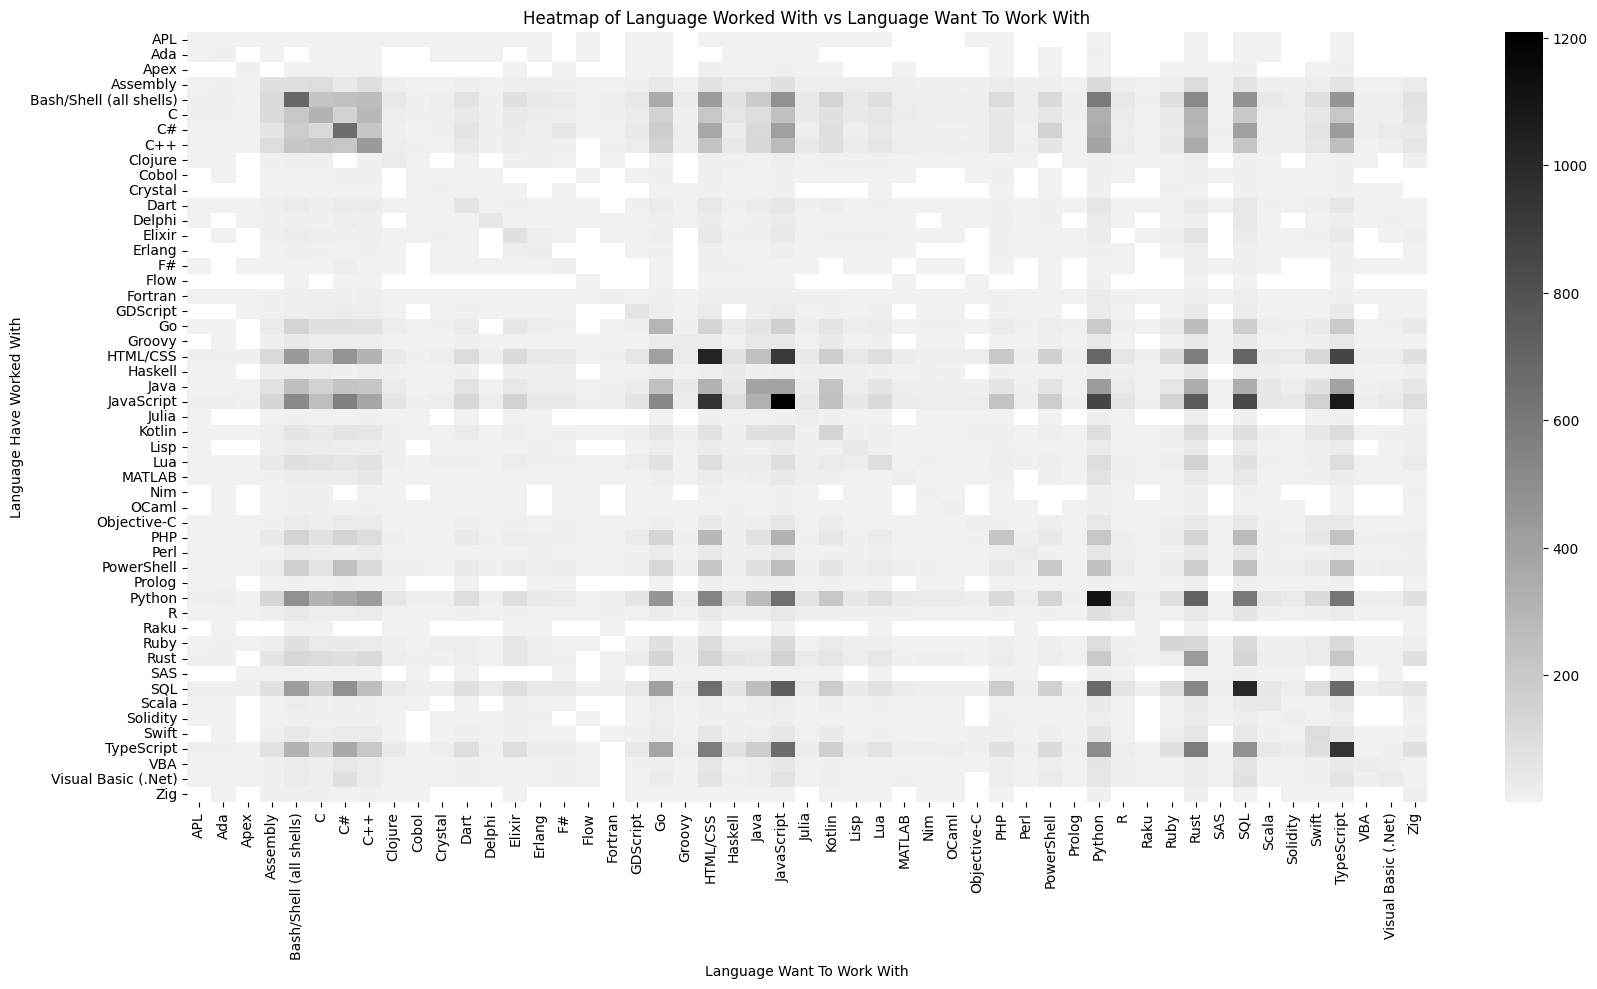

In [ ]:
heatmap_data = grouped_df_question_4.pivot(index='LanguageHaveWorkedWith', columns='LanguageWantToWorkWith', values='count')
light_palette = sns.light_palette("black", as_cmap=True)
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, annot=False, cmap=light_palette)
plt.title('Heatmap of Language Worked With vs Language Want To Work With')
plt.xlabel('Language Want To Work With')
plt.ylabel('Language Have Worked With')
plt.show()

## Analysis results

From the heat chart above, we can draw some notable points:

* Java, JavaScript, HTML/CSS, Python, SQL, TypeScript, Bash/Shell, C, C#, C++ are currently being used to work more than other programming languages.
* Flow, Apex, APL, Nim, Raku, Ocaml, Zig are used languages ​​that work less than other programming languages
* For people who are using Python, JavaScript for work, both will tend to stay the same programming language they are using. And highly correlated with languages ​​like: TypeScript, SQL, Java, HTML/CSS.